In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

/Users/shuran/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
assets = ['PG', '^GSPC']
pf_data = pd.DataFrame()
for asset in assets:
    pf_data[asset] = wb.DataReader(asset, data_source='yahoo', start='2010-1-1')['Adj Close']

pf_data.head()

,PG,^GSPC
Date,,
2010-01-04,44.058792,1132.989990
2010-01-05,44.073223,1136.520020
2010-01-06,43.864162,1137.140015
2010-01-07,43.626297,1141.689941
2010-01-08,43.568630,1144.979980


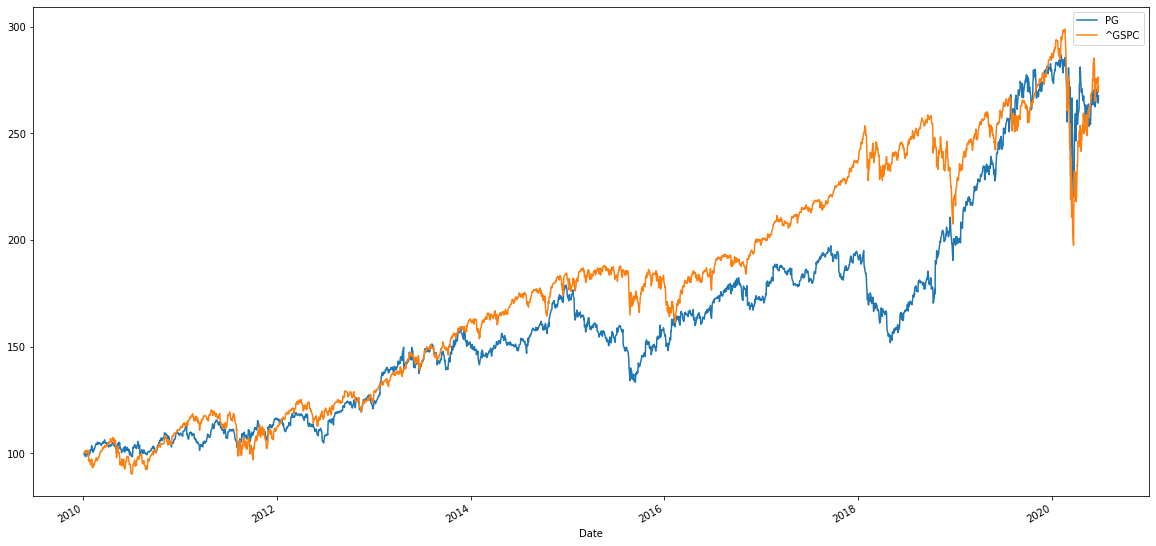

In [4]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(20,10))

In [5]:
log_returns = np.log(pf_data / pf_data.shift(1)).dropna()
annual_log_returns_mean = log_returns.mean() * 252
annual_log_returns_mean

PG       0.094056
^GSPC    0.095686
dtype: float64

In [6]:
# Create two random weights
weights = np.random.random(len(assets))
# Standardize weights 
weights /= np.sum(weights)
weights

array([0.76644093, 0.23355907])

In [7]:
# Expected portfolio return
np.sum(weights * log_returns.mean()) * 252

0.09443665507457717

In [8]:
#Expected portfolio variance
np.dot(weights.T, np.dot(log_returns.cov() * 252, weights))

0.025675883788901944

In [9]:
# Expected portfolio volatility
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))

0.16023696136941049

In [16]:
# Here we try 1000 combinations of the same investment portfolio with S&P500 and PG stocks
pfolio_returns = []
pfolio_volatility = []

for n in range(1000):
    weights = np.random.random(len(assets))
    weights /= np.sum(weights)
    pfolio_returns.append(np.dot(weights, log_returns.mean()) * 250)
    pfolio_volatility.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))

print(f"pfolio_returns = {pfolio_returns}")
print(f"pfolio_volatility = {pfolio_volatility}")

pfolio_returns = [0.09377781301802313, 0.09331019082009573, 0.0937997004015147, 0.09363027625702229, 0.09374341714973795, 0.09382947568263851, 0.09358676593882018, 0.0934967584019159, 0.09343835863795649, 0.0943486636444814, 0.09458556211409799, 0.09461910514383187, 0.09408139779583667, 0.09482085760751172, 0.0948611182153482, 0.09447587483784665, 0.09383689789730587, 0.09431585413023841, 0.09378218910593117, 0.0942962902736382, 0.09447384568724204, 0.09340314214999072, 0.0941765213267183, 0.0937885477142118, 0.09348670116712848, 0.0933348935909414, 0.0944157803857545, 0.09374957472080295, 0.09404187984010398, 0.09453498554919149, 0.09414573770089894, 0.09424849831048078, 0.09370912569234574, 0.094554875054419, 0.09401042316108162, 0.09413493350819811, 0.09387970884557109, 0.0946863916347264, 0.09391843275435133, 0.0945585220429244, 0.09417903678364244, 0.09359368401453069, 0.09442567572093728, 0.09451849169130597, 0.09439947424719111, 0.09410075616822433, 0.09421511787180108, 0.094259

In [11]:
# Convert pfolio_volatility and pfolio_returns to np.array:
pfolio_returns = np.array(pfolio_returns)
pfolio_volatility = np.array(pfolio_volatility)
pfolio_returns, pfolio_volatility

(array([0.09379405, 0.093942  , 0.09368377, 0.09392564, 0.09378419,
        0.0940206 , 0.09437191, 0.0937777 , 0.09386811, 0.09416746,
        0.09454279, 0.09380981, 0.09393935, 0.09395529, 0.09414988,
        0.09404695, 0.09461755, 0.09373471, 0.09381629, 0.09419205,
        0.09408857, 0.09346398, 0.0942505 , 0.09355339, 0.09404976,
        0.09488393, 0.09487666, 0.09443955, 0.09338081, 0.09380581,
        0.09414527, 0.09359927, 0.09333548, 0.0946077 , 0.09445113,
        0.09418267, 0.09394091, 0.09383928, 0.09437254, 0.09335428,
        0.09410734, 0.09484816, 0.09404657, 0.09398638, 0.09405348,
        0.09428619, 0.09402952, 0.0945227 , 0.09427031, 0.09421172,
        0.09357834, 0.09348168, 0.09405691, 0.094843  , 0.09376413,
        0.09428979, 0.09359113, 0.09400261, 0.09385177, 0.09420295,
        0.09402698, 0.0947744 , 0.09438428, 0.0934207 , 0.09439777,
        0.09371322, 0.09331836, 0.09405659, 0.09423452, 0.09430849,
        0.09438276, 0.09429282, 0.0946005 , 0.09

Text(0, 0.5, 'Expected Return')

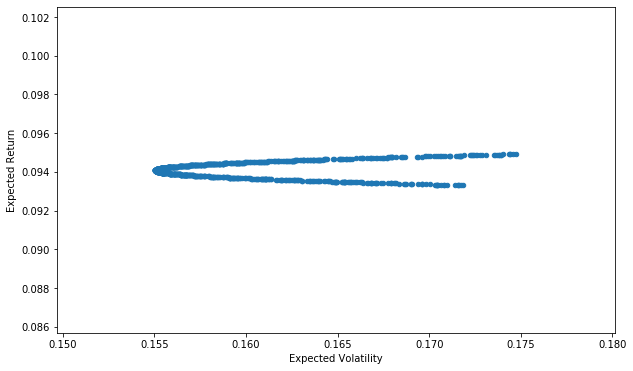

In [17]:
# Create a portfolio based on these two np.arrays:
portfolio = pd.DataFrame({"returns": pfolio_returns, "volatility": pfolio_volatility})
portfolio.plot(x='volatility', y='returns', kind="scatter", figsize=(10,6))
plt.xlabel('Expected Volatility')
plt.ylabel("Expected Return")